In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

num_datasets=[10,40,80,200]
num_nodes=[2,10,40,100]

#Empty arrays for final training/validation errors (avg of shuffle errors)
final_train_error=np.zeros((4,4))
final_valid_error=np.zeros((4,4))

#Making early stop call back 75 epochs after validation loss starts to increase
#This is fine because the later code takes the minimum total error
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=75)

#Loop through all datasets
for i_datasets, datasets in enumerate(num_datasets):
    #Generating data and target data
    f2_xdata=np.array(4*np.random.rand(datasets)-2)
    f2_ydata=np.exp(-f2_xdata**2)*np.arctan(f2_xdata)*np.sin(4*np.pi*f2_xdata)
    #Splitting data 80/20 training/testing
    f2train_x, f2test_x, f2train_y, f2test_y = train_test_split(f2_xdata, f2_ydata, test_size=0.20)
    i_folds=0
    
    #Handler for first dataset size of 8 training
    #Declares k-fold cross validation array of shuffled indexes
    if (len(f2train_x)==8):
        i_folds=4
        kfold = KFold(n_splits=i_folds, shuffle=True)
    else:
        i_folds=10
        kfold = KFold(n_splits=i_folds, shuffle=True)
    
    #Iterate through every node size
    for i_nodes, nodes in enumerate(num_nodes):
        #Build single hidden layer model
        model = Sequential()
        model.add(Dense(nodes, input_shape=(1,), kernel_initializer=keras.initializers.RandomNormal(mean=0., stddev=10), bias_initializer=keras.initializers.RandomNormal(mean=0., stddev=10), activation='sigmoid', name='hiddeninput'))
        model.add(Dense(1, activation='linear', name='output'))
        model.compile(Adam(lr=0.1), loss='mean_squared_error', metrics=['accuracy'])
        #Empty arrays to hold each shuffle error (avg of k-cross errors)
        train_shuffle_errors=np.array([])
        valid_shuffle_errors=np.array([])
        
        #Shuffle 5 times
        for i_shuffle in range(5):
            #Empty arrays to hold each k-cross error
            train_kcross_errors=np.array([])
            valid_kcross_errors=np.array([])
            
            #Perform k-cross validation
            for train, evalu in kfold.split(f2train_x, f2train_y):
                #Training model with callback to early stop
                history=model.fit(f2train_x[train], f2train_y[train], validation_data=(f2train_x[evalu], f2train_y[evalu]), epochs=1000, verbose=0, callbacks=[es])
                #Finding index when total error is the smallest
                total_error=np.array(history.history['val_loss'])+np.array(history.history['loss'])
                i_valid_min=np.argmin(total_error)
                #Add training/validation errors when total error is smallest
                train_kcross_errors=np.append(train_kcross_errors, np.array(history.history['loss'])[i_valid_min])
                valid_kcross_errors=np.append(valid_kcross_errors, np.array(history.history['val_loss'])[i_valid_min])
            #Add averaged k-cross errors to shuffle array
            train_shuffle_errors=np.append(train_shuffle_errors, np.sum(train_kcross_errors)/i_folds)
            valid_shuffle_errors=np.append(valid_shuffle_errors, np.sum(valid_kcross_errors)/i_folds)
        #Add averaged shuffle errors to final array
        final_train_error[i_datasets][i_nodes]=np.sum(train_shuffle_errors)/5
        final_valid_error[i_datasets][i_nodes]=np.sum(valid_shuffle_errors)/5

print(final_train_error)
print(final_valid_error)
                

Epoch 00096: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00079: early stopping
Epoch 00076: early stopping
Epoch 00085: early stopping
Epoch 00087: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00085: early stopping
Epoch 00077: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00085: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00083: early stopping
Epoch 00077: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00082: early stopping
Epoch 00084: early stopping
Epoch 00081: early stopping
Epoch 00077: early stopping
Epoch 00108: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00089: early stopping
Epoch 00076: early stopping
Epoch 00078: early stopping
Epoch 00080: early s

Epoch 00094: early stopping
Epoch 00076: early stopping
Epoch 00092: early stopping
Epoch 00076: early stopping
Epoch 00079: early stopping
Epoch 00076: early stopping
Epoch 00082: early stopping
Epoch 00078: early stopping
Epoch 00076: early stopping
Epoch 00080: early stopping
Epoch 00077: early stopping
Epoch 00077: early stopping
Epoch 00077: early stopping
Epoch 00079: early stopping
Epoch 00080: early stopping
Epoch 00077: early stopping
Epoch 00083: early stopping
Epoch 00077: early stopping
Epoch 00090: early stopping
Epoch 00079: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00077: early stopping
Epoch 00076: early stopping
Epoch 00079: early stopping
Epoch 00077: early stopping
Epoch 00076: early stopping
Epoch 00081: early stopping
Epoch 00084: early stopping
Epoch 00076: early stopping
Epoch 00079: early stopping
Epoch 00080: early stopping
Epoch 00077: early stopping
Epoch 00076: early stopping
Epoch 00076: early stopping
Epoch 00079: early s

Epoch 00276: early stopping
Epoch 00092: early stopping
Epoch 00200: early stopping
Epoch 00089: early stopping
Epoch 00076: early stopping
Epoch 00077: early stopping
Epoch 00076: early stopping
Epoch 00312: early stopping
Epoch 00076: early stopping
Epoch 00077: early stopping
Epoch 00109: early stopping
Epoch 00076: early stopping
Epoch 00092: early stopping
Epoch 00175: early stopping
Epoch 00134: early stopping
Epoch 00090: early stopping
Epoch 00124: early stopping
Epoch 00076: early stopping
Epoch 00086: early stopping
Epoch 00093: early stopping
Epoch 00077: early stopping
Epoch 00084: early stopping
Epoch 00105: early stopping
Epoch 00138: early stopping
Epoch 00090: early stopping
Epoch 00079: early stopping
Epoch 00083: early stopping
Epoch 00076: early stopping
Epoch 00088: early stopping
Epoch 00096: early stopping
Epoch 00079: early stopping
Epoch 00181: early stopping
Epoch 00081: early stopping
Epoch 00230: early stopping
Epoch 00076: early stopping
Epoch 00076: early s

Epoch 00081: early stopping
Epoch 00099: early stopping
Epoch 00078: early stopping
Epoch 00102: early stopping
Epoch 00102: early stopping
Epoch 00520: early stopping
Epoch 00151: early stopping
Epoch 00097: early stopping
Epoch 00208: early stopping
Epoch 00160: early stopping
Epoch 00166: early stopping
Epoch 00111: early stopping
Epoch 00100: early stopping
Epoch 00199: early stopping
Epoch 00154: early stopping
Epoch 00136: early stopping
Epoch 00079: early stopping
Epoch 00209: early stopping
Epoch 00167: early stopping
Epoch 00524: early stopping
Epoch 00117: early stopping
Epoch 00122: early stopping
Epoch 00132: early stopping
Epoch 00112: early stopping
Epoch 00088: early stopping
Epoch 00111: early stopping
Epoch 00087: early stopping
Epoch 00110: early stopping
Epoch 00143: early stopping
Epoch 00098: early stopping
Epoch 00131: early stopping
Epoch 00109: early stopping
Epoch 00116: early stopping
Epoch 00110: early stopping
Epoch 00165: early stopping
Epoch 00103: early s

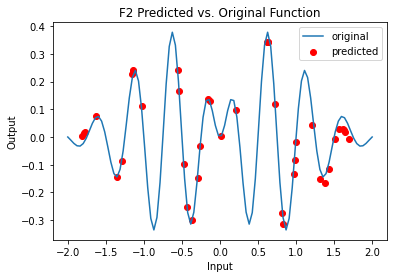

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


num_datasets=200
num_nodes=100

#Generating data and target data
f2_xdata=np.array(4*np.random.rand(num_datasets)-2)
f2_ydata=np.exp(-f2_xdata**2)*np.arctan(f2_xdata)*np.sin(4*np.pi*f2_xdata)
#Splitting data into 80% train and 20% test
f2train_x, f2test_x, f2train_y, f2test_y = train_test_split(f2_xdata, f2_ydata, test_size=0.20)

#Making model with single hidden layer
model = Sequential()
model.add(Dense(num_nodes, input_shape=(1,), kernel_initializer=keras.initializers.RandomNormal(mean=0., stddev=10), bias_initializer=keras.initializers.RandomNormal(mean=0., stddev=10), activation='sigmoid', name='hiddeninput'))
model.add(Dense(1, activation='linear', name='output'))
model.compile(Adam(lr=0.1), loss='mean_squared_error', metrics=['accuracy'])
#Training model with 1000 epochs
model.fit(f2train_x, f2train_y, epochs=2000, verbose=0)

#Predicting trained model on the test data
ynew = model.predict(f2test_x)

#Plotting
x=np.linspace(-2,2,100)
y=np.exp(-x**2)*np.arctan(x)*np.sin(4*np.pi*x)
plt.plot(x,y, label='original')
plt.scatter(f2test_x,ynew, label='predicted', color='red')
plt.legend()
plt.title('F2 Predicted vs. Original Function')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

                